In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from nibabel.testing import data_path

In [11]:
# image_data = os.path.join(data_path, 'RM-Samples')

In [14]:
import nibabel

In [16]:
image = nibabel.load('./RM-Samples/Normal001-MRA.nii.gz')
print(image.shape)

(448, 448, 128)


In [18]:
header = image.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 448 448 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.       0.513393 0.513393 0.800001 0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -0.0
qoffset_y       : -0.0
qoffset_z       : 0.0
srow_x

In [25]:
np.set_printoptions(precision=3, suppress=True)

In [26]:
# affine array relating array coordinates from the image data array to coordinates in some RAS+ world coordinate system
affineArraey = image.affine
print(affineArraey.shape)
print(affineArraey)

(4, 4)
[[-0.513  0.     0.    -0.   ]
 [ 0.    -0.513  0.    -0.   ]
 [ 0.     0.     0.8    0.   ]
 [ 0.     0.     0.     1.   ]]


In [30]:
# image slicing
croppedImage = image.slicer[1:242, 1:225, 1:54]
print(croppedImage.shape)

(241, 224, 53)


In [32]:
affinedCroppedIMAGE = croppedImage.affine
print(affinedCroppedIMAGE.shape)
print(affinedCroppedIMAGE)

(4, 4)
[[-0.513  0.     0.    -0.513]
 [ 0.    -0.513  0.    -0.513]
 [ 0.     0.     0.8    0.8  ]
 [ 0.     0.     0.     1.   ]]


In [36]:
croppedImage.get_data_dtype()   # returns signed 2-byte integer type

dtype('<i2')

In [68]:
import SimpleITK
import cv2
from skimage.color import rgb2gray

In [39]:
imgRead = SimpleITK.ReadImage('./RM-Samples/Normal001-MRA.nii.gz')

In [45]:
image = imgRead[1:242, 1:225, 1:54]

In [46]:
print(image.GetSize())
print(image.GetOrigin())
print(image.GetSpacing())
print(image.GetDirection())
print(image.GetNumberOfComponentsPerPixel())

(241, 224, 53)
(0.513392984867096, 0.513392984867096, 0.8000010251998901)
(0.513392984867096, 0.513392984867096, 0.8000010251998901)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
1


In [47]:
print(image.GetWidth())
print(image.GetHeight())
print(image.GetDepth())

241
224
53


In [72]:
imageSlice = rgb2gray(SimpleITK.GetArrayViewFromImage(imgRead)[2, 1:500, 1:500])

print(imageSlice)

[[ 9 13  5 ... 19 11 20]
 [ 5  4  8 ... 29 15  8]
 [11  9 14 ... 20 13 26]
 ...
 [12 24  9 ... 12  9 31]
 [ 8  5 15 ... 26 10 13]
 [23 15 23 ... 31 15 15]]


(-0.5, 446.5, 446.5, -0.5)

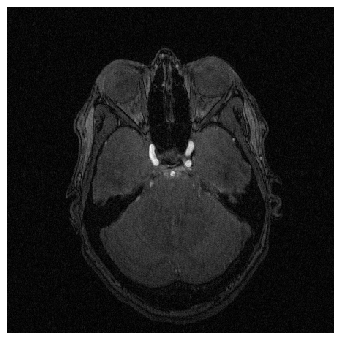

In [78]:
plt.figure(figsize=(6,6))
plt.imshow(imageSlice, cmap='gray')
plt.axis('off')